# Exploratory Data Analysis

Intro

## Outline
1. Overview of Raw Data
2. Reshaping the Data for Sequential Analysis
3. Conversation Analysis
4. Text Analysis
5. Speaker Sequence Analysis
6. Topic Frequency Analysis
7. Summary

## 1. Overview of Raw Data

Download and observe the raw data.

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import seaborn as sns
import textstat
import warnings

warnings.filterwarnings('ignore')

In [2]:
# from datasets import load_dataset

# dataset = load_dataset("goendalf666/sales-conversations")
# df = pd.DataFrame(dataset["train"])

# df.head()

In [3]:
# # Save to csv
# dataset["train"].to_csv("sales_conversations.csv", index=False)

In [4]:
df = pd.read_csv("../data/raw/sales_conversations.csv")

df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"Customer: Hi, Im interested in purchasing a ne...","Salesman: Of course, Id be happy to assist you...",Customer: Im looking for a laptop that can han...,Salesman: Absolutely! In order to find the bes...,Customer: Im considering upgrading my companys...,Salesman: Thank you for considering us for you...,Customer: Im in the market for a new smartwatc...,"Salesman: Absolutely! Before we proceed, could...",Customer: Im looking to buy a new printer for ...,Salesman: Certainly! To assist you in finding ...,Customer: Im interested in purchasing a gaming...,Salesman: Great! Before I can recommend the id...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Customer: Hi, Im interested in learning more a...","Salesman: Great! Im happy to help. Tell me, wh...",Customer: Ive been experiencing digestive issu...,Salesman: I understand how frustrating that ca...,"Customer: Ive tried different products before,...",Salesman: I completely understand your skeptic...,Customer: Im concerned about the potential sid...,Salesman: Safety is our top priority. Our dige...,Customer: Im still unsure. Can you share some ...,Salesman: Absolutely! We have numerous success...,Customer: I appreciate your assistance. Ill ta...,"Salesman: Of course, take all the time you nee...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Customer: Hi, Im interested in investing in th...",Salesman: Of course! Id be happy to assist you...,Customer: Ive had some bad experiences with fi...,Salesman: I understand your concerns. Trust is...,Customer: I have specific financial goals and ...,Salesman: Absolutely! Building a strong rappor...,Customer: Im not sure if I should invest in st...,Salesman: Lets discuss your investment horizon...,Customer: Ive heard about other investment fir...,Salesman: Great question! We differentiate our...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(3412, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3411 non-null   object
 1   1       3411 non-null   object
 2   2       3388 non-null   object
 3   3       3388 non-null   object
 4   4       3387 non-null   object
 5   5       3387 non-null   object
 6   6       3357 non-null   object
 7   7       3357 non-null   object
 8   8       2961 non-null   object
 9   9       2961 non-null   object
 10  10      2280 non-null   object
 11  11      2280 non-null   object
 12  12      1391 non-null   object
 13  13      1391 non-null   object
 14  14      733 non-null    object
 15  15      733 non-null    object
 16  16      16 non-null     object
 17  17      16 non-null     object
 18  18      3 non-null      object
 19  19      3 non-null      object
dtypes: object(20)
memory usage: 533.2+ KB


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,3411,3411,3388,3388,3387,3387,3357,3357,2961,2961,2280,2280,1391,1391,733,733,16,16,3,3
unique,1817,3066,2931,3301,3118,3377,3117,3353,2816,2953,2166,2274,1336,1388,709,729,16,16,3,3
top,Customer: Im interested in investing in the st...,"Salesman: If I understand correctly, you menti...",Customer: Im looking for a smartphone with a g...,Salesman: I understand how frustrating that mu...,Customer: Im not sure if this product will mee...,Salesman: Could you please tell me more about ...,Customer: Do you have any testimonials from sa...,Salesman: While digital communication tools of...,"Customer: If I understand correctly, you are l...","Salesman: If I understand correctly, you are l...","Customer: Just to confirm, are you saying that...",Salesman: Different digital platforms cater to...,Customer: How can I stay updated with the late...,"Salesman: Technology is constantly evolving, a...",Customer: How can technology enhance my sales ...,Salesman: By effectively utilizing technology ...,Customer: I understand the importance of socia...,Salesman: Im glad you see the value! Leveragin...,Customer: How do you communicate the benefits ...,Salesman: We employ persuasive language and st...
freq,124,61,24,62,36,3,18,2,17,3,12,6,12,4,5,4,1,1,1,1


In [8]:
# Check for null values - It will be more telling after we reshape the dataset
df.isnull().sum()

0        1
1        1
2       24
3       24
4       25
5       25
6       55
7       55
8      451
9      451
10    1132
11    1132
12    2021
13    2021
14    2679
15    2679
16    3396
17    3396
18    3409
19    3409
dtype: int64

___

## 2. Reshaping the Data for Sequential Analysis
This section involves making each row represent a single conversation snippet/turn and dissecting features such as speaker and text.
* Partially contains preprocessing

In [9]:
df = pd.read_csv("../data/raw/sales_conversations.csv")
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"Customer: Hi, Im interested in purchasing a ne...","Salesman: Of course, Id be happy to assist you...",Customer: Im looking for a laptop that can han...,Salesman: Absolutely! In order to find the bes...,Customer: Im considering upgrading my companys...,Salesman: Thank you for considering us for you...,Customer: Im in the market for a new smartwatc...,"Salesman: Absolutely! Before we proceed, could...",Customer: Im looking to buy a new printer for ...,Salesman: Certainly! To assist you in finding ...,Customer: Im interested in purchasing a gaming...,Salesman: Great! Before I can recommend the id...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Customer: Hi, Im interested in learning more a...","Salesman: Great! Im happy to help. Tell me, wh...",Customer: Ive been experiencing digestive issu...,Salesman: I understand how frustrating that ca...,"Customer: Ive tried different products before,...",Salesman: I completely understand your skeptic...,Customer: Im concerned about the potential sid...,Salesman: Safety is our top priority. Our dige...,Customer: Im still unsure. Can you share some ...,Salesman: Absolutely! We have numerous success...,Customer: I appreciate your assistance. Ill ta...,"Salesman: Of course, take all the time you nee...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Customer: Hi, Im interested in investing in th...",Salesman: Of course! Id be happy to assist you...,Customer: Ive had some bad experiences with fi...,Salesman: I understand your concerns. Trust is...,Customer: I have specific financial goals and ...,Salesman: Absolutely! Building a strong rappor...,Customer: Im not sure if I should invest in st...,Salesman: Lets discuss your investment horizon...,Customer: Ive heard about other investment fir...,Salesman: Great question! We differentiate our...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Add a unique ID to each convo in the original df to keep the texts grouped by convo after reshaping
df['conversation_id'] = range(len(df))

In [11]:
# Separate snippets into rows, keeping conversation_id as an identifier
df_melted = df.melt(id_vars=['conversation_id'], var_name="turn", value_name="snippet")
df_melted['turn'] = pd.to_numeric(df_melted['turn'], errors='coerce')
df_melted.shape

(68240, 3)

In [12]:
df_melted.head()

,conversation_id,turn,snippet
0,0,0,"Customer: Hi, Im interested in purchasing a ne..."
1,1,0,"Customer: Hi, Im interested in learning more a..."
2,2,0,"Customer: Hi, Im interested in investing in th..."
3,3,0,"Customer: Hello, Im interested in your financi..."
4,4,0,"Customer: Hi, Im interested in purchasing a ne..."


In [13]:
# Check that it still has conversation groupings (convos have a max of 20 turns as the original df had 20 columns)
df_melted.value_counts('conversation_id')

conversation_id
0       20
2267    20
2269    20
2270    20
2271    20
        ..
1139    20
1140    20
1141    20
1142    20
3411    20
Name: count, Length: 3412, dtype: int64

In [14]:
# Drop NaN values (placeholder cells that were at the end of conversations to keep the original df size)
df_melted = df_melted.dropna()
df_melted.shape

(41854, 3)

Some conversations have fewer turns, as shown by the decrease in count after dropping NaNs.

In [15]:
convo_counts = df_melted['conversation_id'].value_counts() # num snippets per convo
convo_counts

conversation_id
3238    20
2959    20
978     20
3034    18
996     18
        ..
2028     2
1873     2
3154     2
3070     2
1962     2
Name: count, Length: 3411, dtype: int64

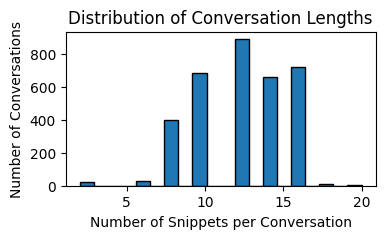

In [16]:
plt.figure(figsize=(4, 2))
plt.hist(convo_counts, bins=20, edgecolor='k')  # Adjust bins as needed
plt.xlabel('Number of Snippets per Conversation')
plt.ylabel('Number of Conversations')
plt.title('Distribution of Conversation Lengths')
plt.show()

In [17]:
# Check if there are any rows where a snippet doesn't contain a colon
no_colon_rows = df_melted[~df_melted['snippet'].str.contains(':')]
print(f"Number of rows without a colon: {no_colon_rows.shape[0]}")

Number of rows without a colon: 0


In [18]:
element_types = df_melted['snippet'].apply(type)
element_types.value_counts()

snippet
<class 'str'>    41854
Name: count, dtype: int64

In [19]:
# Remove any leading or trailing whitespace
df_melted['snippet'] = df_melted['snippet'].str.strip()

In [20]:
# Separate the speaker and text from each snippet

# error - it splits if ':' is present, but the above code shows that it's always present and always a str?
# df_melted[['Speaker', 'Text']] = df_melted['Snippet'].str.split(':', 1, expand=True)

df_melted[['speaker', 'text']] = df_melted['snippet'].apply(
    lambda x: x.split(":", 1) if ":" in x else [x, None] # to handle rows with unexpected formatting
).apply(pd.Series)

In [21]:
df_melted.head()

,conversation_id,turn,snippet,speaker,text
0,0,0,"Customer: Hi, Im interested in purchasing a ne...",Customer,"Hi, Im interested in purchasing a new smartph..."
1,1,0,"Customer: Hi, Im interested in learning more a...",Customer,"Hi, Im interested in learning more about your..."
2,2,0,"Customer: Hi, Im interested in investing in th...",Customer,"Hi, Im interested in investing in the stock m..."
3,3,0,"Customer: Hello, Im interested in your financi...",Customer,"Hello, Im interested in your financial planni..."
4,4,0,"Customer: Hi, Im interested in purchasing a ne...",Customer,"Hi, Im interested in purchasing a new laptop...."


In [22]:
# Remove redundant column
df_melted = df_melted.drop(columns=['snippet'])
df_melted.columns

Index(['conversation_id', 'turn', 'speaker', 'text'], dtype='object')

In [26]:
# Save the reshaped, processed data
# df_melted.to_csv("../data/processed/sequential_convos.csv", index=False)

In [27]:
# Column types
df_melted.dtypes

conversation_id     int64
turn                int64
speaker            object
text               object
dtype: object

In [28]:
# Missing values
df_melted.isnull().sum()

conversation_id    0
turn               0
speaker            0
text               0
dtype: int64

In [29]:
# Final dimensions of reshaped df
df_melted.shape

(41854, 4)

___

## 3. Conversation Analysis

In [30]:
# Number of conversations
print(f"Number of Conversations: {df_melted['conversation_id'].nunique()}")

Number of Conversations: 3411


In [31]:
# Average text length per convo
mean_text_lens = df_melted.groupby('conversation_id')['text'].apply(lambda x: x.str.len().mean())
print(f"Min text length: {mean_text_lens.min()}")
print(f"Max text length: {mean_text_lens.max()}")
print(f"Average text length: {round(mean_text_lens.mean(), 2)}")

Min text length: 59.0
Max text length: 397.4
Average text length: 146.42


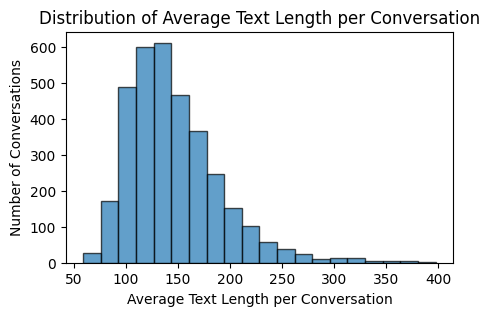

In [32]:
# Histogram of Average Text Lengths per Convo
plt.figure(figsize=(5, 3))
plt.hist(mean_text_lens, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel("Average Text Length per Conversation")
plt.ylabel("Number of Conversations")
plt.title("Distribution of Average Text Length per Conversation")
plt.show()

In [35]:
# Conversation length: The number of turns per convo
turns_per_convo = df_melted.groupby('conversation_id').size()
turns_per_convo.head()

conversation_id
0    12
1    12
2    10
3    10
4    16
dtype: int64

In [36]:
# Average conversation length, along with other basic stats
turns_per_convo.describe()

count    3411.000000
mean       12.270302
std         2.814853
min         2.000000
25%        10.000000
50%        12.000000
75%        14.000000
max        20.000000
dtype: float64

In [37]:
# Outliers in terms of turns (according to the IQR method)

Q1 = turns_per_convo.quantile(0.25)
Q3 = turns_per_convo.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = turns_per_convo[(turns_per_convo < lower_bound) | (turns_per_convo > upper_bound)]

# Outlier conversations
outliers

conversation_id
683     2
1101    2
1137    2
1214    2
1215    2
1231    2
1873    2
1877    2
1921    2
1962    2
1981    2
2006    2
2028    2
2038    2
2231    2
2311    2
2712    2
2805    2
3007    2
3070    2
3096    2
3154    2
3198    2
dtype: int64

In [38]:
# Number of outliers
len(outliers)

23

In [39]:
# Number of abnormally long convos
len(turns_per_convo[(turns_per_convo > upper_bound)])

0

In [40]:
# Number of abnormally short convos - These are all of the outliers
len(turns_per_convo[(turns_per_convo < lower_bound)])

23

In [41]:
df_melted[df_melted['conversation_id'].isin(outliers.index)].sort_values('conversation_id').head(10)

,conversation_id,turn,speaker,text
683,683,0,Customer,I understand. Ill take all of this into accou...
4095,683,1,Salesman,Youre welcome! Were here to help. If you have...
1101,1101,0,Customer,Im convinced. Ill make the purchase right away.
4513,1101,1,Salesman,Fantastic! Youve made an excellent decision. ...
1137,1137,0,Customer,Thank you for explaining. I feel more compell...
4549,1137,1,Salesman,Youre welcome! Were here to assist you in mak...
1214,1214,0,Customer,Im looking for a long-term investment partner...
4626,1214,1,Salesman,Building long-term relationships is a priorit...
1215,1215,0,Customer,That sounds perfect. I appreciate your dedica...
4627,1215,1,Salesman,Thank you for your trust! Were confident that...


In [42]:
# Looking at the original dataset, it looks like reshaping was performed correctly,
# but the fault lies in the data collection itself (something like that).
# They seem to be just parts of conversations. Very short parts. Removing these outliers in preprocessing.
df.iloc[outliers.index].head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,conversation_id
683,Customer: I understand. Ill take all of this i...,Salesman: Youre welcome! Were here to help. If...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,683
1101,Customer: Im convinced. Ill make the purchase ...,Salesman: Fantastic! Youve made an excellent d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101
1137,Customer: Thank you for explaining. I feel mor...,Salesman: Youre welcome! Were here to assist y...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1137
1214,Customer: Im looking for a long-term investmen...,Salesman: Building long-term relationships is ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1214
1215,Customer: That sounds perfect. I appreciate yo...,Salesman: Thank you for your trust! Were confi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1215


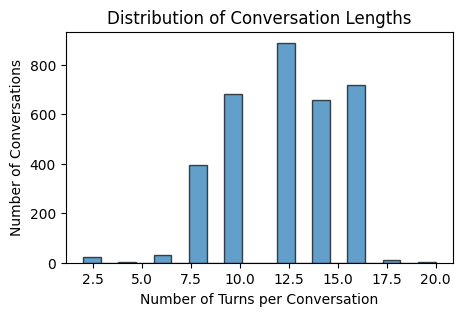

In [43]:
# Plot a histogram of conversation lengths
plt.figure(figsize=(5, 3))
plt.hist(turns_per_convo, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel("Number of Turns per Conversation")
plt.ylabel("Number of Conversations")
plt.title("Distribution of Conversation Lengths")
plt.show()

### **TODO: ^ is the same information as the previous plot. Remove / condense / clean up**
* And summarize findings? insights/implications for preprocessing or modeling

___

## 4. Text Analysis
* The characteristics and structure of the texts, rather than their topics

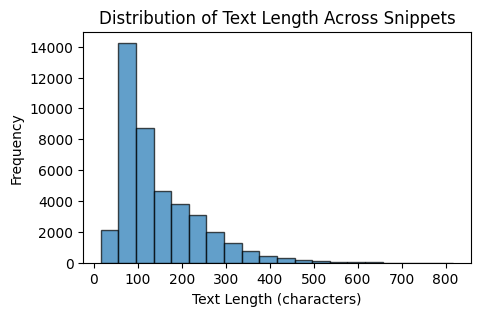

In [44]:
# Text Length Distribution: Text length for each snippet
df_melted["text_length"] = df_melted["text"].str.len()

plt.figure(figsize=(5, 3))
plt.hist(df_melted["text_length"], bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.title("Distribution of Text Length Across Snippets")
plt.show()

In [45]:
# Display basic statistics for text length to provide further insights
df_melted["text_length"].describe()

count    41854.000000
mean       147.262842
std         92.908993
min         16.000000
25%         81.000000
50%        113.000000
75%        193.000000
max        817.000000
Name: text_length, dtype: float64

**Text Complexity**

In [46]:
# Text Complexity: Average sentence length (in words)
df_melted['sentence_length'] = df_melted['text'].apply(lambda x: len(x.split()) / max(1, sum(x.count(p) for p in ['.', '?', '!'])))
print("Average Sentence Length Summary Statistics:")
df_melted["sentence_length"].describe()

Average Sentence Length Summary Statistics:


count    41854.000000
mean        10.436824
std          3.336831
min          1.250000
25%          8.000000
50%         10.000000
75%         12.250000
max         56.000000
Name: sentence_length, dtype: float64

In [47]:
# Text Complexity: Readability score (for each snippet)
df_melted['readability'] = df_melted['text'].apply(textstat.flesch_reading_ease)
print("Readability Summary Statistics:")
print(df_melted["readability"].describe())

Readability Summary Statistics:
count    41854.000000
mean        60.698278
std         20.694169
min        -52.720000
25%         47.450000
50%         62.340000
75%         75.200000
max        119.190000
Name: readability, dtype: float64


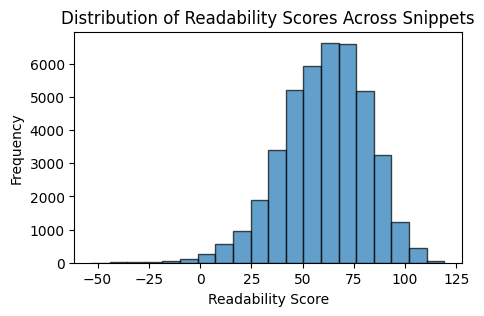

In [48]:
# Readability score distribution
plt.figure(figsize=(5, 3))
plt.hist(df_melted["readability"], bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Readability Score")
plt.ylabel("Frequency")
plt.title("Distribution of Readability Scores Across Snippets")
plt.show()

**Frequent Words**

In [49]:
# Get stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Tokenize and count the words (excluding stopwords)
all_words = " ".join(df_melted["text"]).lower().split()
filtered_words = [word for word in all_words if word.isalpha() and word not in stop_words]
word_counts = Counter(filtered_words)

# Most common words
common_words = word_counts.most_common(10)
common_words_df = pd.DataFrame(common_words, columns=["word", "frequency"])
print("Most Common Words:\n", common_words_df)

Most Common Words:
          word  frequency
0          im      13304
1     provide       5957
2     product       5194
3  understand       5178
4    specific       4922
5   financial       4507
6      health       3799
7         let       3594
8        help       3567
9        sure       3559


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jacquelinehong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


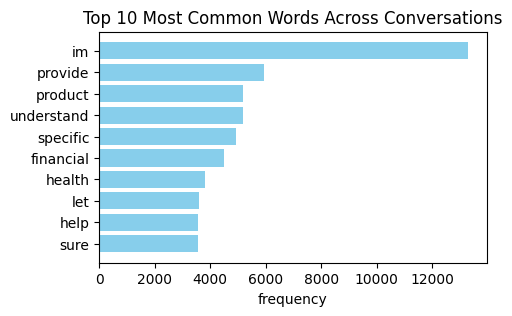

In [50]:
# Most common words visualized
plt.figure(figsize=(5, 3))
plt.barh(common_words_df["word"], common_words_df["frequency"], color="skyblue")
plt.xlabel("frequency")
plt.title("Top 10 Most Common Words Across Conversations")
plt.gca().invert_yaxis()
plt.show()

**Speaker-Specific Patterns**

**Response Length by Speaker**

In [51]:
# Response length: Average response length (word count) per text by speaker
df_melted['word_count'] = df_melted['text'].apply(lambda x: len(str(x).split()))
length_by_speaker_stats = df_melted.groupby('speaker')['word_count'].describe()
length_by_speaker_stats

,count,mean,std,min,25%,50%,75%,max
speaker,,,,,,,,
Customer,20927.0,14.348258,3.999474,3.0,11.0,14.0,17.0,37.0
Salesman,20927.0,32.744302,13.788109,5.0,23.0,30.0,39.0,130.0


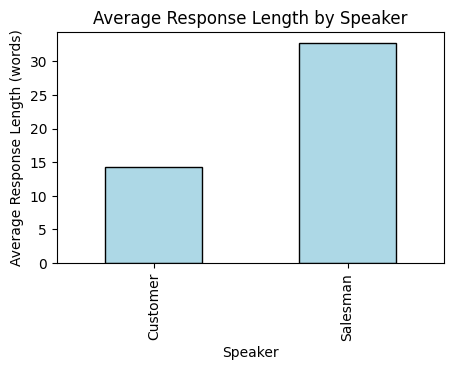

In [52]:
# Visualization for average response length by speaker
plt.figure(figsize=(5, 3))
length_by_speaker_stats['mean'].plot(kind='bar', color="lightblue", edgecolor="black")
plt.xlabel("Speaker")
plt.ylabel("Average Response Length (words)")
plt.title("Average Response Length by Speaker")
plt.show()

* The Salesman uses over 2x more words on average than the Customer.

**Most Common Words by Speaker**

In [53]:
# Most Common Words by Speaker

# Tokenize text for each speaker and remove stopwords
speaker_words = {speaker: " ".join(df_melted[df_melted['speaker'] == speaker]['text']).lower().split() for speaker in df_melted['speaker'].unique()}
speaker_word_counts = {speaker: Counter([word for word in words if word.isalpha() and word not in stop_words]) for speaker, words in speaker_words.items()}

for speaker, word_count in speaker_word_counts.items():
    print(f"\nMost Common Words for {speaker.capitalize()}:")
    common_words = pd.DataFrame(word_count.most_common(10), columns=["word", "frequency"])
    print(common_words)


Most Common Words for Customer:
         word  frequency
0          im      12284
1         ive       3153
2        sure       3101
3  interested       2879
4     product       2046
5   financial       1752
6      health       1691
7     looking       1572
8     provide       1455
9         new       1328

Most Common Words for Salesman:
         word  frequency
0  understand       4704
1     provide       4502
2    specific       4404
3         let       3588
4     product       3148
5   financial       2755
6       share       2598
7        help       2296
8        lets       2194
9      health       2108


**Vocabulary Analysis**

**Customer:** The most common words suggest that they have interests in products, financial info, and health.
* "I'm,"  "interested"/"looking",  "product"/"financial"/"health".

**Salesman:** The most common words suggest that they are playing a supportive role by attending to customer requests and providing the information that they are looking for.

The difference in their most common words indicates that the Customer is an inquirer and the Samlesman's role is of a provider of targeted information.

**Sentiment Analysis**:

The goal is to aid in understanding the tone of each response and speaker type.
* Sentiment labeling was moved to `label_generation.ipynb`, which is a notebook that was created after this entire `EDA.ipynb` process.

In [54]:
# load sentiment labels
sentiment_df = pd.read_csv("../data/processed/labeled_sequential_convos.csv")
sentiment_df.head()

,conversation_id,turn,speaker,text,sentiment_score,sentiment_label,conversation_stage,response_type
0,0,0,Customer,"Hi, Im interested in purchasing a new smartph...",0.8625,positive,Introduction,Question
1,1,0,Customer,"Hi, Im interested in learning more about your...",0.4019,positive,Introduction,Small Talk
2,2,0,Customer,"Hi, Im interested in investing in the stock m...",0.6597,positive,Introduction,Question
3,3,0,Customer,"Hello, Im interested in your financial planni...",0.4019,positive,Introduction,Small Talk
4,4,0,Customer,"Hi, Im interested in purchasing a new laptop....",0.6597,positive,Introduction,Question


In [55]:
sentiment_distribution = sentiment_df.groupby(["speaker", "sentiment_label"]).size().unstack(fill_value=0)
print("Sentiment Distribution by Speaker")
sentiment_distribution

Sentiment Distribution by Speaker


sentiment_label,negative,neutral,positive
speaker,,,
Customer,5280,5013,10634
Salesman,1474,960,18493


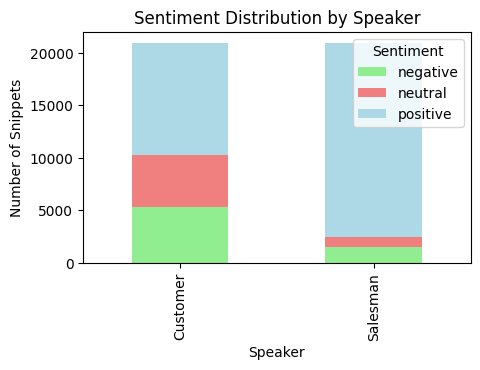

In [56]:
# Visual comparison of sentiment for each speaker
sentiment_distribution.plot(kind="bar", stacked=True, figsize=(5, 3), color=["lightgreen", "lightcoral", "lightblue"])
plt.xlabel("Speaker")
plt.ylabel("Number of Snippets")
plt.title("Sentiment Distribution by Speaker")
plt.legend(title="Sentiment")
plt.show()

* Salesmen tend to have a **significantly larger proportion of positive sentiment** compared to Customers.
    * A more optimistic and reassuring tone towards the Customer
* Customers have a more **varied sentiment distribution**. They still have a lot of positive sentiment but also a substantial amount of negative and neutral snippets, possibly reflecting curiosity and uncertainty.
    * A wider range of emotions

___

## 5. Speaker Sequence Analysis

In [57]:
# Counts of each speaker type
df_melted['speaker'].value_counts()

speaker
Customer    20927
Salesman    20927
Name: count, dtype: int64

In [58]:
# Counts of each speaker per convo
speaker_counts_per_convo = df_melted.groupby(['conversation_id', 'speaker']).size().unstack()
speaker_counts_per_convo

speaker,Customer,Salesman
conversation_id,,
0,6,6
1,6,6
2,5,5
3,5,5
4,8,8
...,...,...
3407,5,5
3408,8,8
3409,5,5


In [59]:
speaker_counts_per_convo.describe()

speaker,Customer,Salesman
count,3411.000000,3411.000000
mean,6.135151,6.135151
std,1.407426,1.407426
min,1.000000,1.000000
25%,5.000000,5.000000
50%,6.000000,6.000000
75%,7.000000,7.000000
max,10.000000,10.000000


In [60]:
# Group by conversation_id and sort by turn to have chronological ordering within each convo
df_melted = df_melted.sort_values(by=['conversation_id', 'turn']).reset_index(drop=True)
df_melted.head()

,conversation_id,turn,speaker,text,text_length,sentence_length,readability,word_count
0,0,0,Customer,"Hi, Im interested in purchasing a new smartph...",87,8.0,80.28,16
1,0,1,Salesman,"Of course, Id be happy to assist you. May I a...",105,10.5,86.20,21
2,0,2,Customer,Im looking for a laptop that can handle graph...,86,6.5,41.36,13
3,0,3,Salesman,Absolutely! In order to find the best laptop ...,159,13.5,52.53,27
4,0,4,Customer,Im considering upgrading my companys server. ...,81,6.0,48.47,12


**Shifting the Speaker Column:** Adding a new column that contains the next speaker for each row within each conversation to be able to see the current speaker and the following speaker side by side.

In [61]:
# Shift the speaker column within each conversation to get the next speaker in sequence
df_melted['next_speaker'] = df_melted.groupby('conversation_id')['speaker'].shift(-1)

In [62]:
df_melted.head()

,conversation_id,turn,speaker,text,text_length,sentence_length,readability,word_count,next_speaker
0,0,0,Customer,"Hi, Im interested in purchasing a new smartph...",87,8.0,80.28,16,Salesman
1,0,1,Salesman,"Of course, Id be happy to assist you. May I a...",105,10.5,86.20,21,Customer
2,0,2,Customer,Im looking for a laptop that can handle graph...,86,6.5,41.36,13,Salesman
3,0,3,Salesman,Absolutely! In order to find the best laptop ...,159,13.5,52.53,27,Customer
4,0,4,Customer,Im considering upgrading my companys server. ...,81,6.0,48.47,12,Salesman


**Transition Frequencies:** The occurrences of each type of transition (eg. Customer -> Salesman, Salesman -> Customer).

In [63]:
# How often each type of speaker transition occurs
transition_counts = df_melted.groupby(['speaker', 'next_speaker']).size().unstack(fill_value=0)
transition_counts

next_speaker,Customer,Salesman
speaker,,
Customer,0,20927
Salesman,17516,0


* There are no instances where a speaker repeats in consecutive turns.
* There are 20927 instances where a customer speaks and the next turn is done by a salesman.
* There are 17516 instances where a salesman speaks and the next turn is done by a customer.
* There are more instances of Customer-Salesman transitions, though this difference may not be significant.

**Analyzing Patterns in Longer Speaker Sequences**

Using trigrams to see frequent transitions in conversations beyond the 2D transition matrix.
* Sequences of three consecutive turns.

In [64]:
# List of speakers in each convo
speaker_sequences = df_melted.groupby('conversation_id')['speaker'].apply(list)

# Generating all trigrams of speaker transitions in each convo
trigrams = []
for sequence in speaker_sequences:
    trigrams.extend([(sequence[i], sequence[i + 1], sequence[i + 2]) for i in range(len(sequence) - 2)])

# The frequency counts of each trigram
trigram_counts = Counter(trigrams)
trigram_counts

Counter({('Customer', 'Salesman', 'Customer'): 17516,
         ('Salesman', 'Customer', 'Salesman'): 17516})

In [65]:
# New column indicating if the speaker is the same as the previous turn within each convo
tmp = df_melted.copy()
tmp['repeated_speaker'] = tmp.groupby('conversation_id')['speaker'].shift() == tmp['speaker']

In [66]:
# Finding conversations that have any repeated speaker turns
non_alternating_convos = tmp[tmp['repeated_speaker']].groupby('conversation_id').size()
non_alternating_convos_ids = non_alternating_convos.index.tolist()

print(f"Conversations with non-alternating speaker sequence: {non_alternating_convos_ids}")

Conversations with non-alternating speaker sequence: []


* Conversations strictly alternate between speakers in this dataset.

___

## 6. Topic Frequency Analysis

In [ ]:
# need to define topics

___

## 7. Summary
* Overall findings, key takeaways
* Next steps